In [199]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

from IPython.display import display, Math

In [200]:
def euler(f, y0, a, b, n):
    x = np.linspace(a, b, n + 1)
    h = (b - a) / n
    y = np.zeros_like(x)
    y[0] = y0

    for i in range(1, n + 1):
        y[i] = y[i - 1] + h * f(
            x[i - 1] + h / 2,
            y[i - 1] + h / 2 * f(x[i - 1], y[i - 1]),
        )

    return x, y

In [201]:
def euler_modified(f, y0, a, b, n):
    x = np.linspace(a, b, n + 1)
    h = (b - a) / n
    y = np.zeros_like(x)
    y[0] = y0

    for i in range(1, n + 1):
        y[i] = y[i - 1] + h * f(x[i - 1], y[i - 1])

    return x, y

In [202]:
def runge_kutta(
    f,
    y0,
    a,
    b,
    n,
):
    x = np.linspace(a, b, n + 1)
    h = (b - a) / n
    y = np.zeros_like(x)
    y[0] = y0

    for i in range(1, n + 1):
        k1 = f(x[i - 1], y[i - 1])
        k2 = f(x[i - 1] + h / 2, y[i - 1] + h / 2 * k1)
        k3 = f(x[i - 1] + h / 2, y[i - 1] + h / 2 * k2)
        k4 = f(x[i - 1] + h, y[i - 1] + h * k3)
        y[i] = y[i - 1] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

    return x, y

In [203]:
f = lambda x, y: (x + 2 * y) / x

n = 20
a = 0.1
b = 1.5
y0 = -0.09

x_linspace = np.linspace(a, b, 100)

In [204]:
x, C1 = sp.symbols("x C1")
y = sp.Function("y")(x)

In [205]:
diff_eq = sp.Eq(y.diff(x), f(x, y))

solution = sp.dsolve(diff_eq)

print("Общее решение:")
display(Math(f"y(x) = {sp.latex(solution.rhs)}"))

Общее решение:


<IPython.core.display.Math object>

In [206]:
particular = solution.subs(C1, 1)

exact_solution = sp.lambdify(x, particular.rhs, "numpy")

print("Частное решение:")
display(Math(f"y(x) = {sp.latex(particular.rhs)}"))

Частное решение:


<IPython.core.display.Math object>

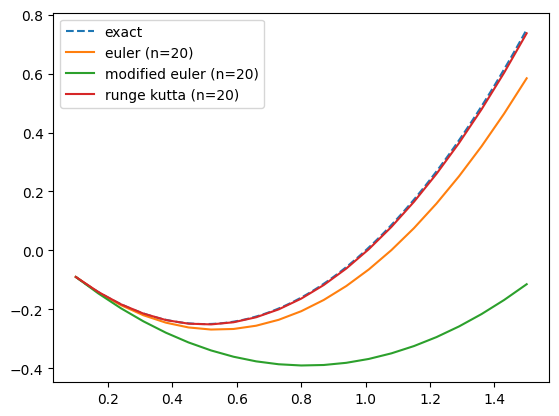

In [207]:
plt.plot(
    x_linspace,
    exact_solution(x_linspace),
    label="exact",
    linestyle="--",
)

plt.plot(
    *euler(
        f,
        y0=y0,
        a=a,
        b=b,
        n=n,
    ),
    label=f"euler (n={n})",
)

plt.plot(
    *euler_modified(
        f,
        y0=y0,
        a=a,
        b=b,
        n=n,
    ),
    label=f"modified euler (n={n})",
)

plt.plot(
    *runge_kutta(
        f,
        y0=y0,
        a=a,
        b=b,
        n=n,
    ),
    label=f"runge kutta (n={n})",
)

plt.legend()